## Exercise 1

Load in the "EnergyEfficiency.csv" data. It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [2]:
#Load the daatset
energy_efficiency = pd.read_csv("Datasets/EnergyEfficiency.csv")
energy_efficiency.head()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
#Basic EDA
energy_efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RelativeCompactness      768 non-null    float64
 1   SurfaceArea              768 non-null    float64
 2   WallArea                 768 non-null    float64
 3   RoofArea                 768 non-null    float64
 4   OverallHeight            768 non-null    float64
 5   Orientation              768 non-null    int64  
 6   GlazingArea              768 non-null    float64
 7   GlazingAreaDistribution  768 non-null    int64  
 8   HeatingLoad              768 non-null    float64
 9   CoolingLoad              768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [9]:
print(f"Missing values:{energy_efficiency.isnull().sum().values}")
print(f"Duplicates:{energy_efficiency.duplicated().sum()}")

Missing values:[0 0 0 0 0 0 0 0 0 0]
Duplicates:0


From this minimal EDA we find out that the variables of the datasets are all numerical and there are no missing or duplicated values.

## 1.Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.

To visualize the relationship/correlation for these two numerical variables we are choosing a scatterplot.

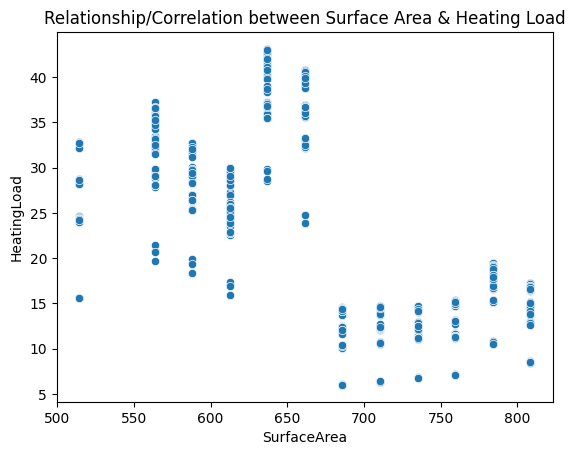

In [10]:
#Visualization of relationship/correlation
sns.scatterplot(data=energy_efficiency, x="SurfaceArea", y="HeatingLoad")
plt.title("Relationship/Correlation between Surface Area & Heating Load")
plt.show()

## 2.Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?

In order to anser this question, we have to quantify the strength of the correlation with pearson's correlation coefficient.

In [11]:
#Correlation and statistical significance
stats.pearsonr(energy_efficiency["SurfaceArea"], energy_efficiency["HeatingLoad"])

PearsonRResult(statistic=np.float64(-0.6581202267776216), pvalue=np.float64(1.6869072902149069e-96))

We can see that there is negative correlation between the two variables. Meaning that as surface area increases in value, the heating load decreases respectively.
The relathionship between the two variables is medium with tendency to strong and the relatioship is statistically significant as the pvalue is almost 0, hence there is very strong evidence of a difference or relationship.

## 3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?


The correlation does not make sense, since we would expect larger surface areas to need larger heating load. 
However, heating loading is a volume metric and it is calculated in cubic measurments(cm, m). Surface area alone is not sufficient to determine heating load. Volume is the driving factor.

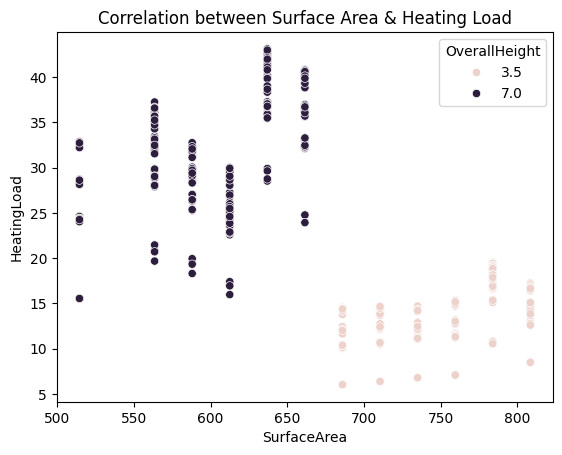

In [12]:
#Visualize correlation with hue OverallHeight
sns.scatterplot(data=energy_efficiency, x="SurfaceArea", y="HeatingLoad", hue="OverallHeight")
plt.title("Correlation between Surface Area & Heating Load")
plt.show()

As we see from the plot, including hue=OverallHeight, we find out that larger surface areas have the tendency to be shorter in overall height. 

In this case the correlation makes sense, since less volume needs less heating loading.

## 4.Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).

To fit the linear regession model we will use the statsmodel.api's OLS(ordinary keast squares)

In [14]:
#Set "SurfaceAre" as independent variable(x)
X = energy_efficiency["SurfaceArea"]

#Add intercept (in the form of colum of 1s)
X = sm.add_constant(X)

#Verify the intercept has been added.
X

,const,SurfaceArea
0,1.0,514.5
1,1.0,514.5
2,1.0,514.5
3,1.0,514.5
4,1.0,563.5
...,...,...
763,1.0,784.0
764,1.0,808.5
765,1.0,808.5
766,1.0,808.5


In [15]:
#Set "HeatingLoad" as dependent variable(y)
y = energy_efficiency["HeatingLoad"]

In [16]:
#Fit linear regression model usin OLS
linear_model = sm.OLS(y, X).fit()

#Get a summary of the model
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.69e-96
Time:                        21:03:33   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.9454      2.111     34.554      0.000      68.801      77.090
SurfaceArea    -0.0754      0.003    -24.192      0.000      -0.082      -0.069
==============================================================================
Omnibus:                       37.973   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.851
Skew:                           0.576   Prob(JB):                     4.95e-10
Kurtosis:                       2.890   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 5.What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?


The coefficient of SurfaceAre in the regression output tells us how much HeatingLoad changes for every 1 unit increase in SurfaceArea.

From the coefficients of the model, we understand that every change of unit of surface area increasing by one, there is a decrease in heating loading by -0.075

## 6.Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.


In order to add the linear regression line to a scatterplot, we first have to calculate the predictions that our model makes.

In [18]:
#Get predictions on our Data
y_pred = linear_model.predict()

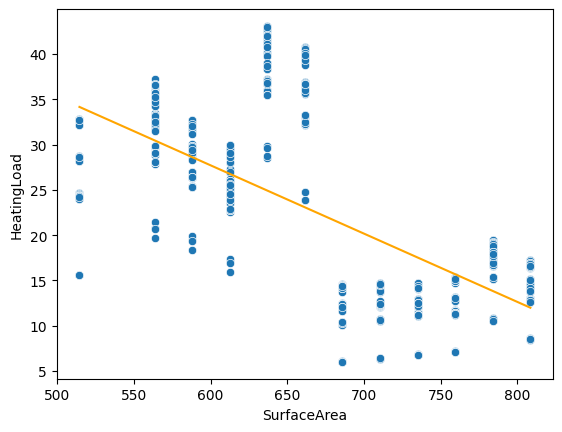

In [19]:
#Add the regression line to the scatter plot
sns.scatterplot(data=energy_efficiency, x="SurfaceArea", y="HeatingLoad")
plt.plot(energy_efficiency["SurfaceArea"], y_pred, color="orange")
plt.show()

## 7.Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

There are 3 evaluation metrics for a simple linear regression.
1. Mean Absolute Error
2. Mean Sqaured Error
3. Root Mean Squared Error -- The accuracy of the model.
Since they are error measures, the smaller the value the better.

In [20]:
#Evaluate the model
linear_model.rsquared
linear_model.rsquared_adj
linear_model.resid

#Print The evaluating score
print(f"Mean Absolut Error(MAE):\n{np.abs(linear_model.resid)}")
print(f"Mean Squared Error(MSE):{np.mean(linear_model.resid**2)}")
print(f"Root Mean Squared Error(RMSR):{np.sqrt(np.mean(linear_model.resid**2))}")

Mean Absolut Error(MAE):
0      18.608690
1      18.608690
2      18.608690
3      18.608690
4       9.624719
         ...    
763     4.038149
764     4.545134
765     4.445134
766     4.485134
767     4.645134
Length: 768, dtype: float64
Mean Squared Error(MSE):57.63983779426343
Root Mean Squared Error(RMSR):7.592090475900786


1. The variation in MAE indicates that the model perform better for some prediction while performing poorly for others.
2. MSE gives more weight on larger errors. If the MSE is high, it probably means that the model is making significant errors for some predictions.
3. RMSE is indicating that on average our model preidctions are off by 7.6 units.

## Exercise 2
Continuing from the previous exercise answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

## 1.Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.

In [24]:
#Define the independent variables
X_multiple = energy_efficiency[["SurfaceArea", "OverallHeight", "WallArea"]]

#Verify the X set
X_multiple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SurfaceArea    768 non-null    float64
 1   OverallHeight  768 non-null    float64
 2   WallArea       768 non-null    float64
dtypes: float64(3)
memory usage: 18.1 KB


In [25]:
#Define the target variable "AreaHeatingLoad"
y = energy_efficiency["HeatingLoad"]

In [27]:
#Add an intercept to X_multiple
X_multiple = sm.add_constant(X_multiple)

#Verify the X set
X_multiple.head()

,const,SurfaceArea,OverallHeight,WallArea
0,1.0,514.5,7.0,294.0
1,1.0,514.5,7.0,294.0
2,1.0,514.5,7.0,294.0
3,1.0,514.5,7.0,294.0
4,1.0,563.5,7.0,318.5


In [28]:
#Fit the model with OLS
multiple_regression_model = sm.OLS(y, X_multiple).fit()

#Get a summary of the model
multiple_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1318.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          1.83e-301
Time:                        21:37:01   Log-Likelihood:                -2165.4
No. Observations:                 768   AIC:                             4339.
Df Residuals:                     764   BIC:                             4357.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -28.8277      4.540     -6.350      0.000     -37.740     -19.916
SurfaceArea       0.0154      0.007      2.195      0.028       0.002       0.029
OverallHeight     5.5304      0.360     15.350      0.000       4.823       6.238
WallArea          0.0369      0.008      4.880      0.000       0.022       0.052
==============================================================================
Omnibus:                       35.991   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.060
Skew:                          -0.384   Prob(JB):                     1.11e-12
Kurtosis:                       4.063   Cond. No.                     2.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. We see high R-squared
2. The intercepts are statistically significant different from 0.

In [29]:
y_pred_multiple = multiple_regression_model.predict()

In [30]:
#Evaluate the model 
#Print The Evalutaion scores
print(F"Mean Abosult Error:{np.mean(np.abs(multiple_regression_model.resid))}")
print(F"Mean Sqaured Error:{np.mean(multiple_regression_model.resid**2)}")
print(F"Root Mean Squared Error:{np.sqrt(np.mean(multiple_regression_model.resid**2))}")

Mean Abosult Error:3.0516941614882036
Mean Sqaured Error:16.46443771827319
Root Mean Squared Error:4.057639426843296


## 2.Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?

In order to compare the evaluation metrics for the two models, we are going to create a dataframe

In [31]:
#Table for the two regression models
metrics = pd.DataFrame({
    "Error Type":["MAE", "MSE", "RMSE"],
    "Multiple linear Regression":[
        np.mean(np.abs(multiple_regression_model.resid)),
        np.mean(multiple_regression_model.resid**2),
        np.sqrt(np.mean(multiple_regression_model.resid**2))
    ],
    "Simple Linear Regression":[
        np.mean(np.abs(linear_model.resid)),
        np.mean(linear_model.resid**2),
        np.sqrt(np.mean(linear_model.resid**2))
    ]
})

metrics

,Error Type,Multiple linear Regression,Simple Linear Regression
0,MAE,3.051694,6.002339
1,MSE,16.464438,57.639838
2,RMSE,4.057639,7.592090


Comparing the two models we can see the following:
1. MAE for multiple linear regression is half from the simple linear regression , meaning the multiple linear regression model makes smaller errors on average.
2. A lower MSE for multiple linear regression suggests that the multiple linear regression model has significant lower variance in errors.
3. A lowe RSME for multiple linear regression confirms that the multiple regression model has a better predictive performance.

Bottom line is, the multiple linear regression model performs better accross all metrics. Using multiple variables, the model captures more complexity and reduces prediction errors. 

The higher error in simple linear regression suggest that relying on jst one predictor does not explain enoigh variability in the target variable.

## 3.Check each of the assumptions/problems for linear regression.

If the assumptions are not met, it means that we cannot completly trust the statistical calculations. Moreover, our evaluations metrics might not truly represent the performance of our model.

1. Non-linearity of the Data
Is there a linear relationship between the independent variables and the dependent?
For multiple regression we cannot make a scatterplot of x and y variables. Instead we can plot the residuals versus the predicted values.

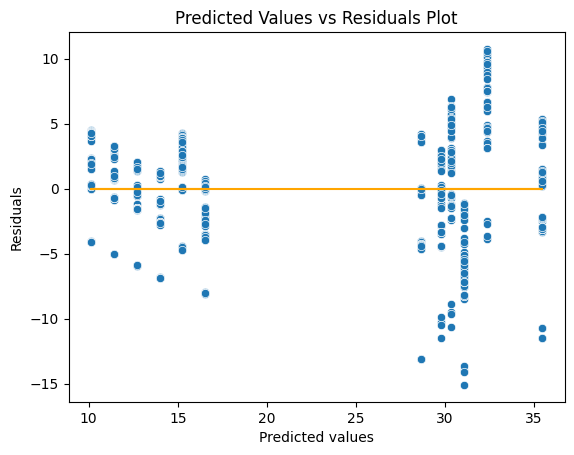

In [33]:
sns.scatterplot(x = y_pred_multiple, y = multiple_regression_model.resid)
plt.plot(y_pred_multiple, np.repeat(0, len(y_pred_multiple)), color = "orange")
plt.title("Predicted Values vs Residuals Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

We can see that there is clear pattern for the residuals and they are not randomly scattered around x-axis. Since it is a multiple linear regression, and we include OverallHeight in our model, perhaps the pattern emerges due to the categories of it. In any case, the pattern indicates that the model violates the assumption of linearity, meaning a linear model might not be the best fit.

2.Correlation of error terms.
Are the error terms correlated?

Text(0.5, 0, 'Data point Index')

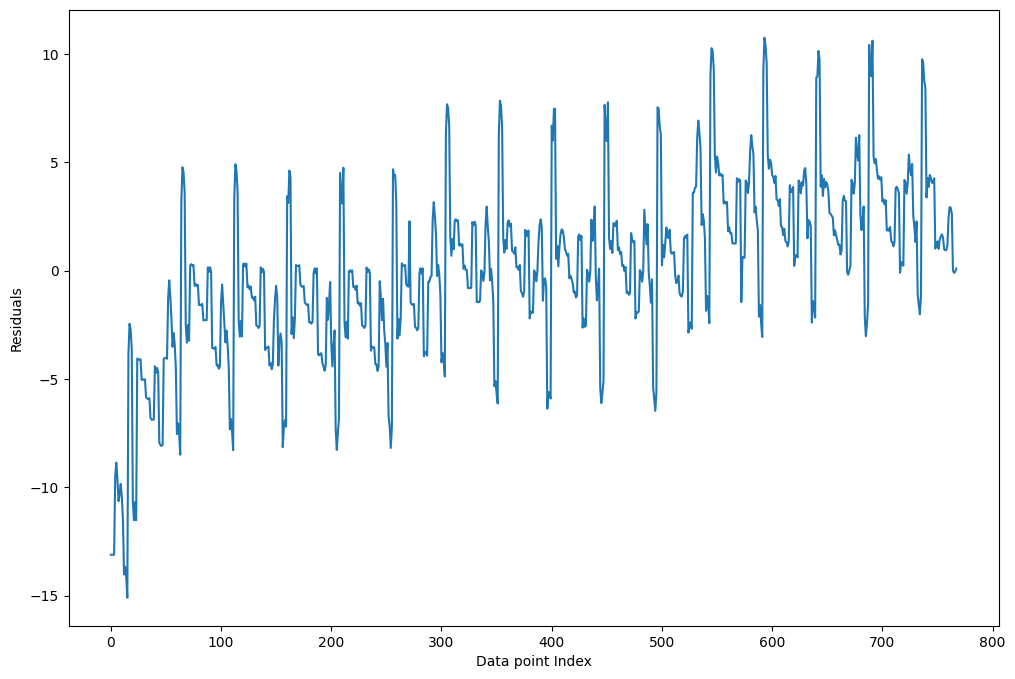

In [34]:
plt.rc("figure", figsize=(12, 8))
sns.lineplot(x=range(0, len(multiple_regression_model.resid)), y = multiple_regression_model.resid)
plt.ylabel("Residuals")
plt.xlabel("Data point Index")

In order to fullfill the the assumption of linearity the residuals should be uncorrelated. Meaning that the i residuals does not tell anything about the i+1. In other words, in a plot they should not present any pattern. In our case though, we see that as the index rises we can distinguish a pattern and they dont appear to be randomly scatters around the x-axis(0).

3. Non-constant variance of error terms
In other words,is there a funnel shape in the residual plot indicating non-constant variance of the error terms.

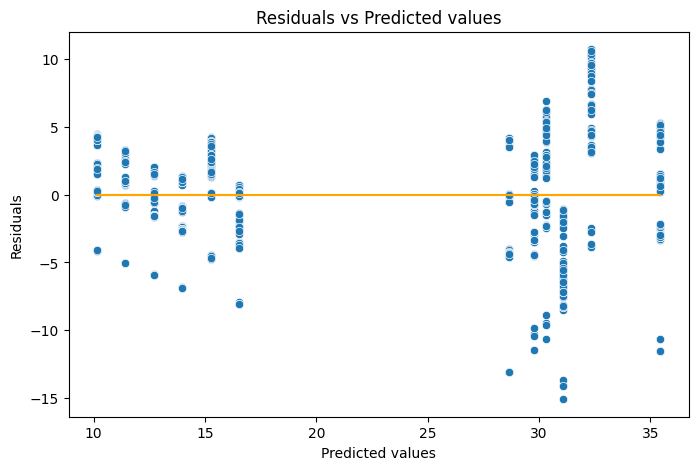

In [36]:
plt.rc("figure", figsize=(8, 5))
sns.scatterplot(x = y_pred_multiple, y = multiple_regression_model.resid)
plt.plot(y_pred_multiple, np.repeat(0, len(y_pred_multiple)), color = "orange")
plt.title("Residuals vs Predicted values")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

From the plot we can see somewhat of a funnel accross the data, and that means that there is an increase in variance.
Thus the assumption of constant variance of the error terms might be violated.

4. Are there outliers?

We can spot outliers in the residuals vs Predicted values plot. 
While there are no clear outliers in the residual plot, there are several points with large residuals for predicted values above 28.

5. High Leverage points?
Data points with unusual predictor values and they can affect where the regression line lies.

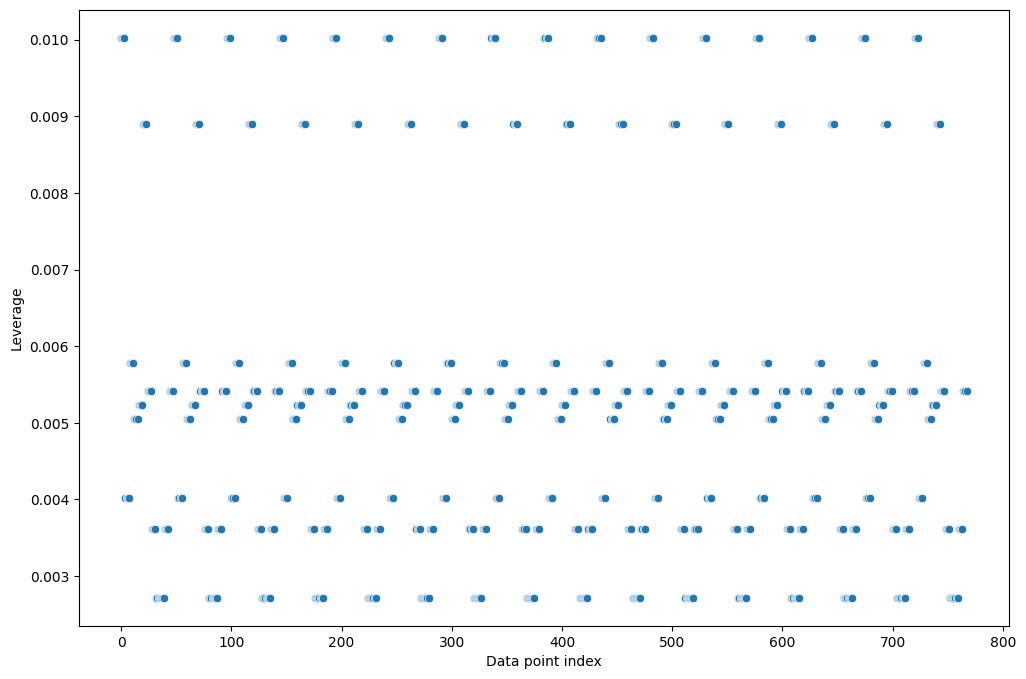

In [38]:
#Leverege statistics
leverageStats = multiple_regression_model.get_influence().hat_matrix_diag
leverageStats

plt.rc("figure", figsize=(12, 8))
sns.scatterplot(x = range(0, len(leverageStats)), y = leverageStats)
plt.ylabel("Leverage")
plt.xlabel("Data point index")
plt.show()

6. Collinearity?
Is there high correlation between two or more independent variables?
Lets look at the correaltion matrix:

In [39]:
#Calulate correlation matrix
X_multiple.corr()

,const,SurfaceArea,OverallHeight,WallArea
const,NaN,NaN,NaN,NaN
SurfaceArea,NaN,1.000000,-0.858148,0.195502
OverallHeight,NaN,-0.858148,1.000000,0.280976
WallArea,NaN,0.195502,0.280976,1.000000


The const value is representing the intercept and its equal to 1 without variance. Hence the correlation between the const and the other variables in NaN.

Regarding the correlation for the other variables, the correlation between OverallHeight and Surface is -0.86 is very strong.

We prefer not to have high correlation between two variables because it can be hard for a linear regression model to separate out the effect on the response variable, coming from each of them.

Simple way to deal with collinearity is to drop one of them.